## House Rent Analysis Notebook
Welcome to the "House Rent Analysis" notebook! In this notebook, we delve into a comprehensive exploration of a house rent dataset to derive valuable insights for various features about renting of houses available on Apartments.com, Zillow, Airbnb and other renting platforms. You can download the dataset on this Kaggle page: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset.

### About the dataset
* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats.
* Size: Size of the Houses/Apartments/Flats in Square Feet.
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
* Area Type: Size of the Houses/Apartments/Flats calculated on either 1) Super Area: includes the built-up area along with additional common areas such as corridors, staircase, lobby, and other shared spaces,
                                                                      2) Carpet Area: the actual usable area within the walls of the house. It excludes the area covered by walls,
                                                                      3) Build Area: includes the carpet area and the thickness of the inner and outer walls.
* Area Locality: Locality of the Houses/Apartments/Flats.
* City: City where the Houses/Apartments/Flats are Located.
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
* Bathroom: Number of Bathrooms.
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

This analysis is structured into two main phases: Simple EDA and Advanced EDA.

### 1. Simple Exploratory Data Analysis
In the initial phase, we conduct a thorough Simple EDA to gain a foundational understanding of the dataset. This includes:

* Descriptive Statistics: Examining basic statistics to understand the distribution of key variables. 
* Data Cleaning: Identifying and handling missing values and duplicates.
* Prepare the dataset for analysis.

### 2. Advanced Exploratory Data Analysis
Building upon the insights gained from Simple EDA, we move into an Advanced EDA to extract deeper insights. This involves:

* Univariate Analysis: Exploring individual variables and detect ouliers.
* Bivariate Analysis: Find relationships between two variables.
* Correlation Analysis: Investigating correlations between variables to uncover hidden patterns.

In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import ceil
from urllib.request import urlopen
import json

In [476]:
df = pd.read_csv('my_path/House_Rent_Dataset.csv')

## Simple EDA

In [477]:
df.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [478]:
df.sample(10)

Posted On  BHK    Rent  Size         Floor    Area Type  \
2421  2022-05-31    3   50000  1670    3 out of 4   Super Area   
4392  2022-06-21    3   12000  1275    4 out of 5  Carpet Area   
1260  2022-07-07    3  100000  2000  25 out of 50   Super Area   
10    2022-05-23    3   25000  1200    1 out of 4  Carpet Area   
2766  2022-06-30    2   15000    75    3 out of 4   Super Area   
3756  2022-05-25    1    8000   700    1 out of 1  Carpet Area   
598   2022-06-20    2   14000   570    4 out of 7  Carpet Area   
4343  2022-05-09    2   12000  1000    2 out of 2   Super Area   
2791  2022-04-29    2   10000   470    2 out of 4   Super Area   
784   2022-06-10    1   27000   400    1 out of 7  Carpet Area   

                        Area Locality       City Furnishing Status  \
2421                       Model Town      Delhi    Semi-Furnished   
4392  Rajendra Nagar, Outer Ring Road  Hyderabad       Unfurnished   
1260       Auris Serenity, Malad West     Mumbai    Semi-Furnished   
10    Action Area 1, Rajarhat Newtown    Kolkata    Semi-Furnished   
2766                      Chhattarpur      Delhi       Unfurnished   
3756           Nemilichery, Chromepet    Chennai       Unfurnished   
598         Kailash Tower, Nalasopara     Mumbai         Furnished   
4343                         Kothapet  Hyderabad    Semi-Furnished   
2791                  Pul Prahlad Pur      Delhi         Furnished   
784              Govandi Station Road     Mumbai       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  
2421  Bachelors/Family         3    Contact Owner  
4392  Bachelors/Family         2    Contact Owner  
1260  Bachelors/Family         4    Contact Agent  
10    Bachelors/Family         2    Contact Agent  
2766  Bachelors/Family         2    Contact Owner  
3756  Bachelors/Family         1    Contact Owner  
598             Family         2    Contact Agent  
4343  Bachelors/Family         2    Contact Owner  
2791  Bachelors/Family         2    Contact Owner  
784   Bachelors/Family         1    Contact Agent

* It seems that the posting year for all rental houses in the dataset is 2022. If it's true, we can drop the year and keep day and month, as they may be useful for this analysis.
* "Floor" column is not very useful in this form. Maybe it's better to split the column into two, "Flat Floor" and "Total Floors". 
* In the "Floor" column, the term "Ground" refers to the floor at street level and later we will label it with the value of 0.

In [479]:
df.shape

(4746, 12)

In [480]:
# Count the non-null values in each column and define column's data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


"Posted On" column is recognized as an object and not as a datetime. We will change its data type later.

In [481]:
# Descriptive statistics for the numerical features
df.describe()

BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000

The maximum number of bathrooms in a house is 10, which seems unusual if we consider that the maximum number of BHK is 6. This might be an outlier in the data.

In [482]:
# Check for missing values
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

The dataset does not contain any missing values in the dataset. Also, as observed from the info(), each column has 4746 Non-Null counts, which aligns with the total number of rows in the dataframe. This observation further confirms the absence of empty values in the dataset. Thus, we do not have to apply any imputation methods.

In [483]:
# Check for duplicates
df.duplicated().sum()

0

The dataset does not contain any duplicates.

In [484]:
# Find the number of unique values in each column
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

We can see that BHK and Bathroom columns have only 6 and 8 unique discrete values, respectively. Due to their limited range,  despite having values of integer data type, we can treat them as categorical features (i.g. visualize them with bar charts). Thus, the only numerical features in the dataset are Rent and Size.

In [485]:
# Type cast of "Posted On" from object to datetime
df["Posted On"] = pd.to_datetime(df["Posted On"])
df["Posted On"].dtype

dtype('<M8[ns]')

note: "M8" is the general representation for datetime64 in pandas and "[ns]" indicates that the datetime values have nanosecond precision. 

In [486]:
df["Posted On"].dt.year.unique()

array([2022], dtype=int32)

Now, we can confirm our assumption that the posting year for all rental houses in the dataset is 2022. After splitting the "Posted On" column, we can drop the year, which is constant for all rows.

In [487]:
# Split "Posted On" into Posted Day and Month
df.insert(0, "Post Day", df["Posted On"].dt.day)
df.insert(1, "Post Month", df["Posted On"].dt.month)
df.drop("Posted On", axis=1, inplace=True)
df.head()

Post Day  Post Month  BHK   Rent  Size            Floor    Area Type  \
0        18           5    2  10000  1100  Ground out of 2   Super Area   
1        13           5    2  20000   800       1 out of 3   Super Area   
2        16           5    2  17000  1000       1 out of 3   Super Area   
3         4           7    2  10000   800       1 out of 2   Super Area   
4         9           5    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [488]:
# Find all unique expressions in "Floor" column
floor_df = df["Floor"].str.split(" ", expand=True)
floor_df[0].value_counts()

0
1         1161
2          945
Ground     927
3          512
4          272
5          164
6           93
7           74
10          67
8           66
9           65
12          47
11          43
15          41
14          34
18          26
Upper       23
17          22
16          21
19          16
13          15
20          12
25          12
Lower       11
23           9
24           6
21           6
30           5
34           4
28           4
35           3
65           3
22           3
26           3
32           3
60           3
27           3
40           2
53           2
45           2
36           2
48           2
29           1
49           1
50           1
39           1
46           1
41           1
44           1
33           1
37           1
47           1
43           1
76           1
Name: count, dtype: int64

We observe that aside from the phrase "Ground out of", which appears 927 times and is more prominent, there are 23 entries with "Upper" and 11 of "Lower" expressions.

In [489]:
# Find the full expression of "Upper"
floor_df.loc[floor_df[0] == "Upper"].head()
# floor_df.loc[floor_df[0] == "Lower"].head()

0         1    2   3   4
290  Upper  Basement  out  of   4
549  Upper  Basement  out  of   9
559  Upper  Basement  out  of  16
631  Upper  Basement  out  of  20
633  Upper  Basement  out  of   9

The full expression of Upper is "Upper Basement out of" and for Lower is "Lower Basement out of".

In [490]:
floor_df.loc[floor_df[0] == "Ground"].head()

0    1   2  3     4
0   Ground  out  of  2  None
5   Ground  out  of  1  None
6   Ground  out  of  4  None
14  Ground  out  of  2  None
17  Ground  out  of  2  None

In [491]:
floor_df.loc[floor_df[3] == "of"].head()

0         1    2   3   4
290  Upper  Basement  out  of   4
518  Lower  Basement  out  of   2
549  Upper  Basement  out  of   9
559  Upper  Basement  out  of  16
631  Upper  Basement  out  of  20

In [492]:
# Split "Floor" into Floor (of the apartment/flat/house) and Total Floors
df.insert(5, "Flat Floor", floor_df[0])
df.insert(6, "Total Floors", pd.concat([floor_df.loc[floor_df[3] != "of", 3], floor_df.loc[floor_df[4].notna(), 4]]).sort_index())
df.drop(columns="Floor", inplace=True)
df.head()

Post Day  Post Month  BHK   Rent  Size Flat Floor Total Floors  \
0        18           5    2  10000  1100     Ground            2   
1        13           5    2  20000   800          1            3   
2        16           5    2  17000  1000          1            3   
3         4           7    2  10000   800          1            2   
4         9           5    2   7500   850          1            2   

     Area Type             Area Locality     City Furnishing Status  \
0   Super Area                    Bandel  Kolkata       Unfurnished   
1   Super Area  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished   
2   Super Area   Salt Lake City Sector 2  Kolkata    Semi-Furnished   
3   Super Area               Dumdum Park  Kolkata       Unfurnished   
4  Carpet Area             South Dum Dum  Kolkata       Unfurnished   

   Tenant Preferred  Bathroom Point of Contact  
0  Bachelors/Family         2    Contact Owner  
1  Bachelors/Family         1    Contact Owner  
2  Bachelors/Family         1    Contact Owner  
3  Bachelors/Family         1    Contact Owner  
4         Bachelors         1    Contact Owner

In [493]:
df.loc[df["Total Floors"].isnull()]

Post Day  Post Month  BHK   Rent  Size Flat Floor Total Floors  \
2553        18           6    2  20000   400          3         None   
2883        23           5    1  18000   450     Ground         None   
4490        12           6    3  15000   900          1         None   
4560        31           5    3  15000  1270          1         None   

        Area Type                              Area Locality       City  \
2553   Super Area           Kasturba Niketan, Lajpat Nagar 2      Delhi   
2883  Carpet Area  DDA Flat AD Block, Shalimar Bagh AD Block      Delhi   
4490   Super Area                             Malakpet, NH 9  Hyderabad   
4560  Carpet Area                                    Tarnaka  Hyderabad   

     Furnishing Status  Tenant Preferred  Bathroom Point of Contact  
2553       Unfurnished  Bachelors/Family         1    Contact Owner  
2883         Furnished  Bachelors/Family         1    Contact Owner  
4490    Semi-Furnished  Bachelors/Family         3    Contact Owner  
4560         Furnished            Family         2    Contact Owner

We have 4 missing values. Checking those rows in the original dataset reveals they were not in the right form. For example, in the row with index 2553, the entry consisted only of the value 3.

In [494]:
# Drop missing values
df.dropna(inplace=True)
df.isnull().sum()

Post Day             0
Post Month           0
BHK                  0
Rent                 0
Size                 0
Flat Floor           0
Total Floors         0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [495]:
# Labeling: Ground->0, Lower->0, Upper->Total Floors
df.loc[df["Flat Floor"].isin(["Ground", "Lower"]), "Flat Floor"] = 0
df.loc[df["Flat Floor"] == "Upper", "Flat Floor"] = df.loc[df["Flat Floor"] == "Upper", "Total Floors"]
df["Flat Floor"] = pd.to_numeric(df["Flat Floor"])
df["Total Floors"] = pd.to_numeric(df["Total Floors"])
df.head()

Post Day  Post Month  BHK   Rent  Size  Flat Floor  Total Floors  \
0        18           5    2  10000  1100           0             2   
1        13           5    2  20000   800           1             3   
2        16           5    2  17000  1000           1             3   
3         4           7    2  10000   800           1             2   
4         9           5    2   7500   850           1             2   

     Area Type             Area Locality     City Furnishing Status  \
0   Super Area                    Bandel  Kolkata       Unfurnished   
1   Super Area  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished   
2   Super Area   Salt Lake City Sector 2  Kolkata    Semi-Furnished   
3   Super Area               Dumdum Park  Kolkata       Unfurnished   
4  Carpet Area             South Dum Dum  Kolkata       Unfurnished   

   Tenant Preferred  Bathroom Point of Contact  
0  Bachelors/Family         2    Contact Owner  
1  Bachelors/Family         1    Contact Owner  
2  Bachelors/Family         1    Contact Owner  
3  Bachelors/Family         1    Contact Owner  
4         Bachelors         1    Contact Owner

In [496]:
df.nunique()

Post Day               31
Post Month              4
BHK                     6
Rent                  243
Size                  615
Flat Floor             52
Total Floors           66
Area Type               3
Area Locality        2233
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

After data preparation:
* There are 31 unique values for "Post Day", which is expected since some months have 31 days.
* It's interesting to note that there are only 4 unique posting months.

In [497]:
# Find the unique values of the columns with their frequencies
cols = ["Post Day", "Post Month", "BHK", "Area Type", "City", "Furnishing Status", "Tenant Preferred", "Bathroom", "Point of Contact"]

for col in cols:
    print(f"\nFrequency of categories in {col}:")
    print(df[col].value_counts())
    # print(df[col].unique())


Frequency of categories in Post Day:
Post Day
6     456
4     264
29    264
23    235
12    219
27    218
10    212
20    192
14    192
30    179
9     171
25    163
7     158
8     155
18    149
2     147
16    147
5     138
22    127
28    113
19    110
31     90
3      87
24     84
1      83
17     81
26     70
21     66
13     61
15     56
11     55
Name: count, dtype: int64

Frequency of categories in Post Month:
Post Month
6    1857
5    1679
7     978
4     228
Name: count, dtype: int64

Frequency of categories in BHK:
BHK
2    2264
1    1166
3    1096
4     189
5      19
6       8
Name: count, dtype: int64

Frequency of categories in Area Type:
Area Type
Super Area     2444
Carpet Area    2296
Built Area        2
Name: count, dtype: int64

Frequency of categories in City:
City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    866
Delhi        603
Kolkata      524
Name: count, dtype: int64

Frequency of categories in Furnishing Status:
Furnishing Status
Semi-Furni

## Advanced EDA

### Univariate Analysis

In [498]:
# Detect Outliers (visualization with plotly)
def box_plot(df, columns):
    subplot_titles = []
    for title in columns:
        subplot_titles.append("Box plot of " + title)
        
    figs = make_subplots(rows=ceil(len(columns)/2), cols = 2, subplot_titles=subplot_titles)
    figs.layout.font.size = 18
    
    current_row = 1
    current_col = 1

    for i, col in enumerate(columns):
        figs.append_trace(go.Box(y=df[col].values, name=col, jitter=0.5), row=current_row, col=current_col)

        current_col += 1
        if current_col > 2:
            current_col = 1
            current_row += 1

    figs.update_annotations(font_size=24)

    figs.update_layout(title=dict(text="Detect Outliers", font=dict(size=30)), height=800, showlegend=False)
    figs.show()

In [499]:
columns = ["BHK", "Rent", "Size", "Flat Floor", "Total Floors", "Bathroom"]
box_plot(df, columns)

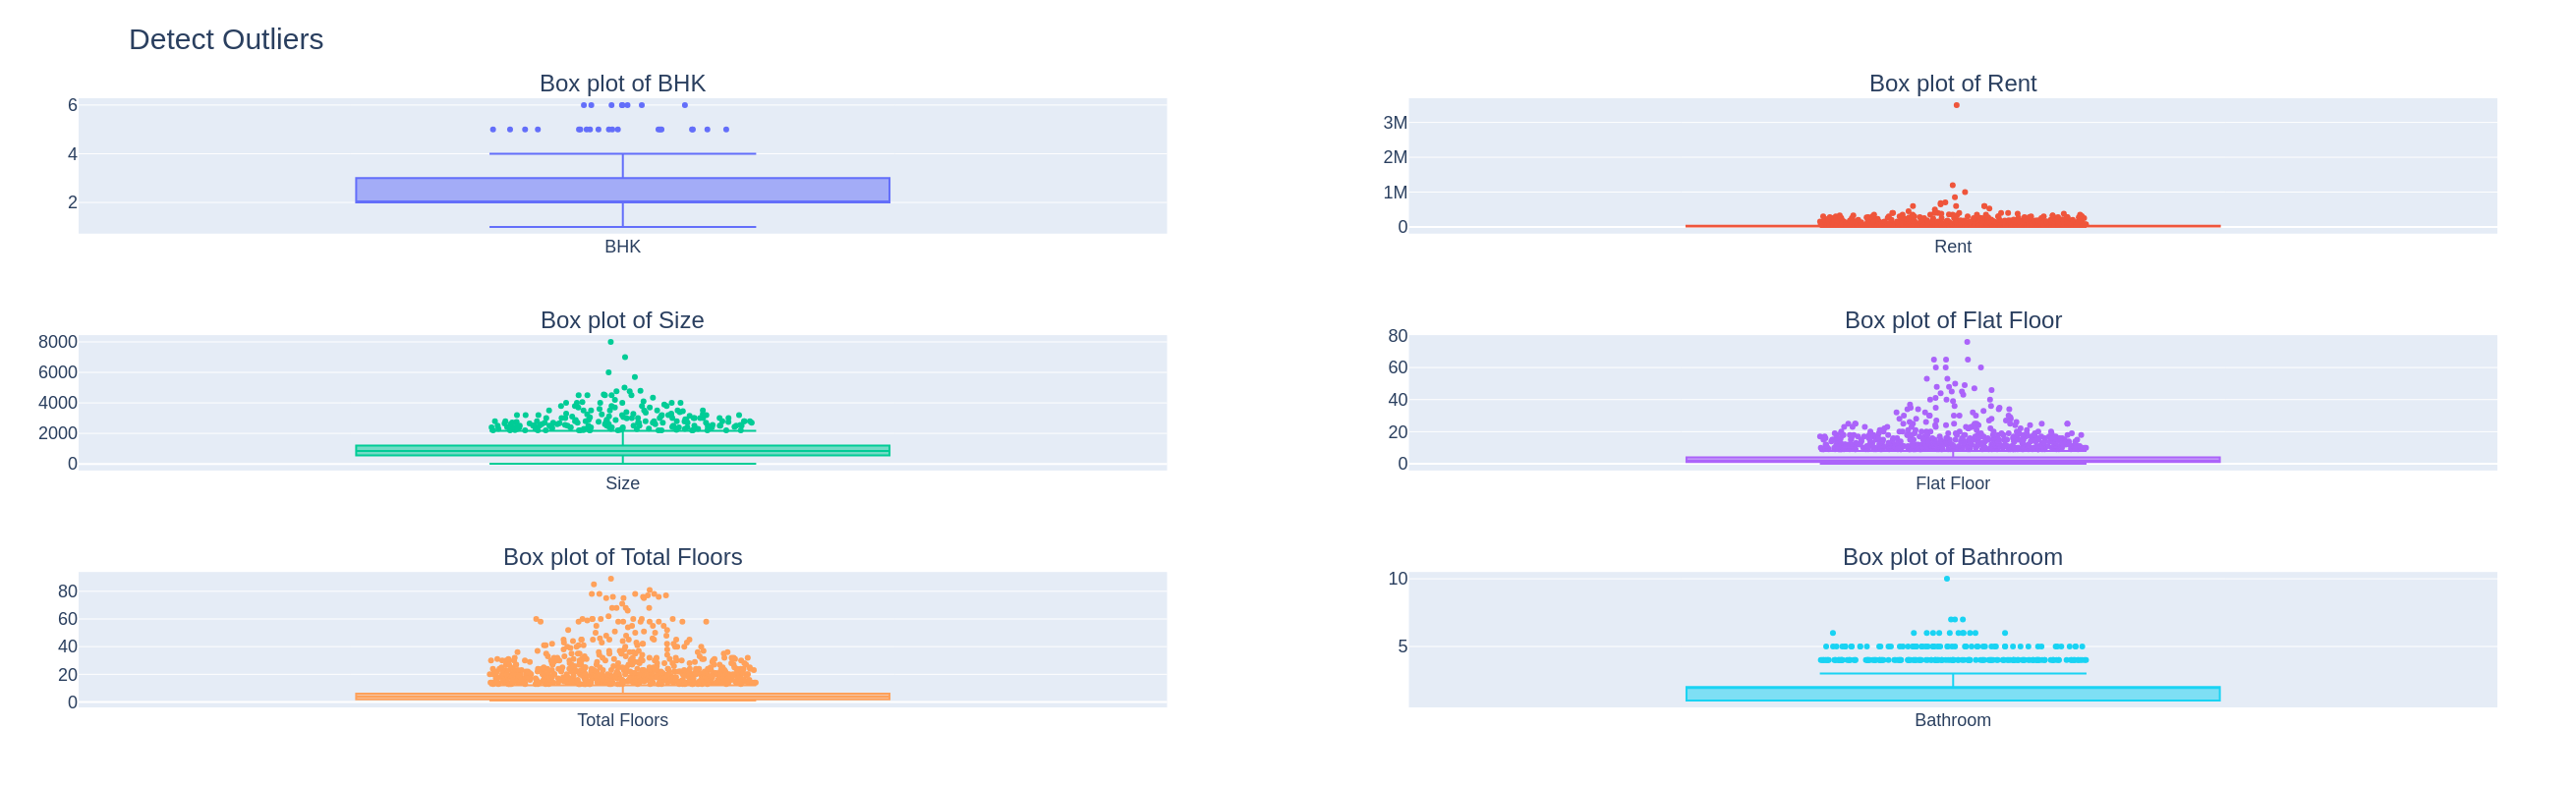

 * All columns have numerous outliers. The majority of these outliers appear to be natural that came from the population, which was evident from the fact that the dataset consists of mostly lower priced houses leading to a lower median rent price.
 * In the "Rent" plot, we observe an outlier with the value of 3.5M, which should be checked. It appears to be an entry error beacuse it lies an abnormal distance from the other values (outliers and not).
 * In the "Size" plot, we observe an outlier with the value of 10, which does not make sense to rent a house of 10 square feet. Also, we will check the 8,000 square feet house.
 * The maximum number of BHK in a house is 6 and the maximum number of bathrooms is 10. It doesn't make any sense.
 * The tallest building in the dataset consists of 89 floors, which is possible. Additionally, the highest floor of a rental flat is 76, making sense as its floor number is lower than the total floors in the tallest building.

In [500]:
# Check the 3.5M rent outlier
df.loc[df["Rent"] == 3500000]

Post Day  Post Month  BHK     Rent  Size  Flat Floor  Total Floors  \
1837         8           6    3  3500000  2500           4             4   

        Area Type Area Locality       City Furnishing Status Tenant Preferred  \
1837  Carpet Area  Marathahalli  Bangalore    Semi-Furnished        Bachelors   

      Bathroom Point of Contact  
1837         3    Contact Agent

In [501]:
df.loc[df["Area Locality"] == "Marathahalli"]

Post Day  Post Month  BHK     Rent  Size  Flat Floor  Total Floors  \
1655         4           7    2    32900  1200           3             6   
1837         8           6    3  3500000  2500           4             4   
1892        23           5    2    18000   600           0             2   
2059        20           6    1    18000   550           3             6   
2086        23           5    2    10000   500           4             4   

        Area Type Area Locality       City Furnishing Status  \
1655  Carpet Area  Marathahalli  Bangalore         Furnished   
1837  Carpet Area  Marathahalli  Bangalore    Semi-Furnished   
1892   Super Area  Marathahalli  Bangalore       Unfurnished   
2059  Carpet Area  Marathahalli  Bangalore    Semi-Furnished   
2086  Carpet Area  Marathahalli  Bangalore       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  
1655  Bachelors/Family         1    Contact Agent  
1837         Bachelors         3    Contact Agent  
1892  Bachelors/Family         2    Contact Owner  
2059  Bachelors/Family         1    Contact Agent  
2086  Bachelors/Family         1    Contact Owner

The prices for houses in the same area locality, Marathahalli, range between 10,000 and 32,900. Moreover, the Furnishing Status is Semi-Furnished. Hence, it doesn't make practical sense for a property to be 105 times more expensive, even though its size is only twice that of the others. Therefore, this data point needs to be considered as outlier and deleted, as it is likely due to entry error.

In [502]:
# Check the 10 sq.ft
df.loc[df["Size"] == 10]

Post Day  Post Month  BHK   Rent  Size  Flat Floor  Total Floors  \
4653        29           6    3  15000    10           1             1   

        Area Type      Area Locality       City Furnishing Status  \
4653  Carpet Area  Ghatkesar, NH 2 2  Hyderabad         Furnished   

      Tenant Preferred  Bathroom Point of Contact  
4653  Bachelors/Family         3    Contact Owner

It is definitely an outlier, as there is no space for 3 BHK and 3 bathrooms in 10 sq.ft. We can replace this value with the median value of the size of rental houses which have 3 BHK and 3 bathrooms and also its area type is carpet. The reason we choose median over mean is beacuse median is less sensitive to outliers than the mean value.

In [503]:
condition = ((df["BHK"] == 3) & (df["Bathroom"] == 3) & (df["Area Type"] == "Carpet Area"))
m = df.loc[condition, "Size"].median()
df.loc[df["Size"] == 10, "Size"] = m
print(f"The median value of the size of rental houses which have 3 BHK and 3 bathrooms and their Area Type is carpet is {m} square feet.")
# df.iloc[4653]

The median value of the size of rental houses which have 3 BHK and 3 bathrooms and their Area Type is carpet is 1450.0 square feet.


In [504]:
# Check the 8,000 sq.ft
df.loc[df["Size"] == 8000]

Post Day  Post Month  BHK    Rent  Size  Flat Floor  Total Floors  \
4185         6           6    1  200000  8000           0             4   

       Area Type                         Area Locality       City  \
4185  Super Area   Beeramguda, Ramachandra Puram, NH 9  Hyderabad   

     Furnishing Status  Tenant Preferred  Bathroom Point of Contact  
4185       Unfurnished  Bachelors/Family        10    Contact Owner

* It makes sense that the flat floor is ground, and the building consists of 4 floors, as it is a really huge house.
* It doesn't make any sense to have only 1 BHK for 8,000 sq.ft house. Also, how it's possible that a house has 10x more bathrooms than BHK.
* This house not only has the 8,000 sq.ft outlier, but also the value of 10 bathrooms is an outlier (observation from box plot). Maybe it's better to remove this row to reduce the impact of these two outliers.

In [505]:
# Remove the outlier values
df.drop(1837, inplace=True)
df.drop(4185, inplace=True)

In [506]:
# Plot Histograms for numerical features
def histogram_plot(df, columns, colors, bins):
    fig = plt.figure(figsize=(3*4, 4*ceil(len(columns) / 3)))

    first = ceil(len(columns) / 3) * 100
    second = 30

    for i, (col, color, bin) in enumerate(zip(columns, colors, bins)):
        ax = fig.add_subplot(first + second + i + 1)
        sns.histplot(data=df[col], label=col, kde=True, ax=ax, color=color, bins=bin)
        ax.set_title(col, fontsize=16)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Count", fontsize=10)

    plt.tight_layout()
    plt.show()

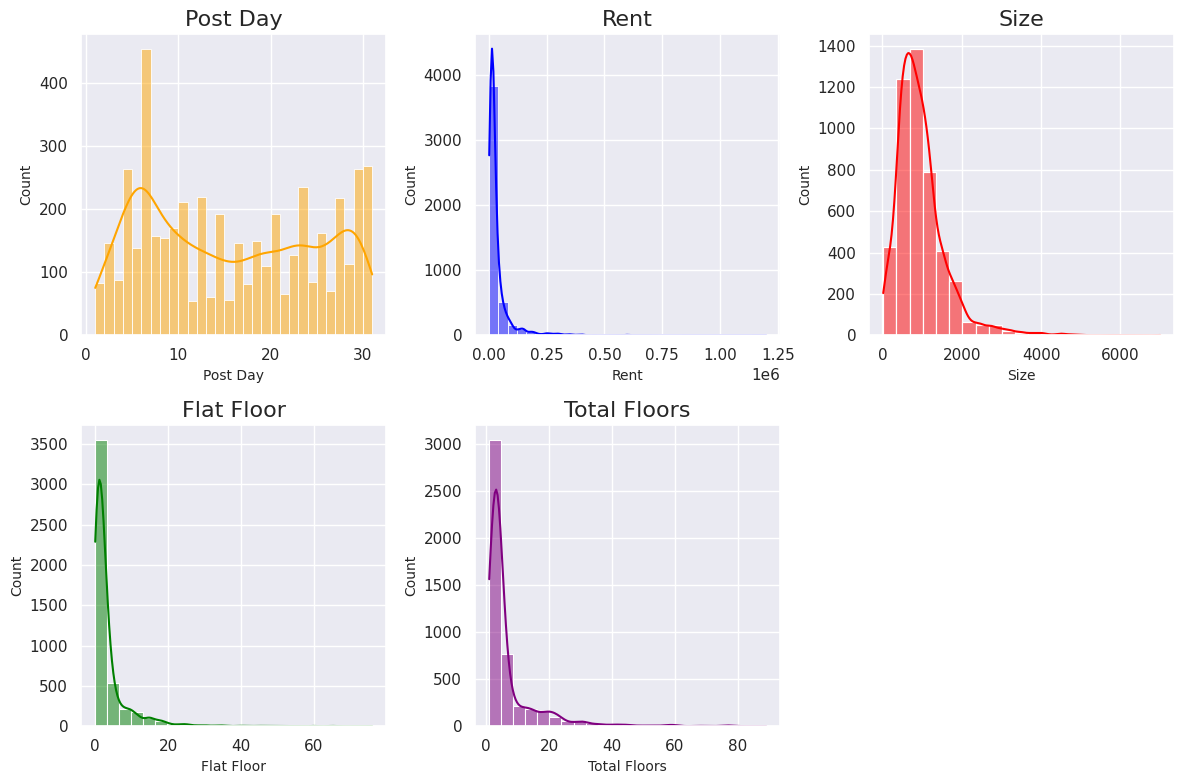

In [507]:
columns = ["Post Day", "Rent", "Size", "Flat Floor", "Total Floors"]
colors = ["orange", "blue", "red", "green", "purple"]
bins = [30, 30, 21, 23, 23]
histogram_plot(df, columns, colors, bins)

* **Post Day**: it seems that in the first half of the month, we have more posts than in the second half. Also, as we approach the middle of the month, we observe a significant decrease in the number of posts. As for the weeks of the month, the first has the most posts. In the plot there are two peaks: the first week and the last week. Moreover, there is a pattern in which, on one day, there are more posts, and the following day there is a decrease.
* **Rent**: in the dataset, most of the houses have rent prices between 1,000 to 40,000. Therefore, we can assume that houses within this range are more in demand in the market. Moreover, there are some houses with rent exceeding  200,000, which could be indicative of luxury properties.
* **Size**: the size of the house plays an important role in the rent value. Most of the houses are between 330 to 1,000 sq.ft, with the majority falling within the 660 to 1,000 sq.ft range. It make sense if we consider that the most of the people don't need and can't afford a big house. Hence, we assume that the houses which are more in demand have a lower rent. However, there is a significant number of houses up to 2,000 sq.ft. 
* **Flat Floor**: the floor of the most houses are between 0 to 4.
* **Total Floors**: the number of total floors of for the majority of buildings is up to 4. 

In [508]:
def bar_chart(df, columns):
    fig, axes = plt.subplots(nrows=ceil(len(columns) / 4), ncols=4, constrained_layout=True, figsize=(16.5, 4*ceil(len(columns) / 4)))
    current_row = 0
    current_col = 0

    for i, col in enumerate(columns):
        if (col in "City"):
            sns.countplot(y=col, data=df, ax=axes[current_row, current_col], 
                          order=df[col].value_counts().index,
                          hue=col, palette="Set1", legend=False)
            axes[current_row, current_col].set_title(f"Distribution of {col}", fontsize=14)
        else:
            sns.countplot(x=col, data=df, ax=axes[current_row, current_col], hue=col, palette="Set1", legend=False)
            axes[current_row, current_col].set_title(f"Distribution of {col}", fontsize=14)

        if (col == "Point of Contact"):
            new_labels = ['Owner', 'Agent', 'Builder']
            axes[current_row, current_col].set_xticklabels(new_labels)

        current_col += 1
        if current_col >= 4:
            current_col = 0
            current_row += 1

    plt.show()

/tmp/ipykernel_4149/1675266956.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



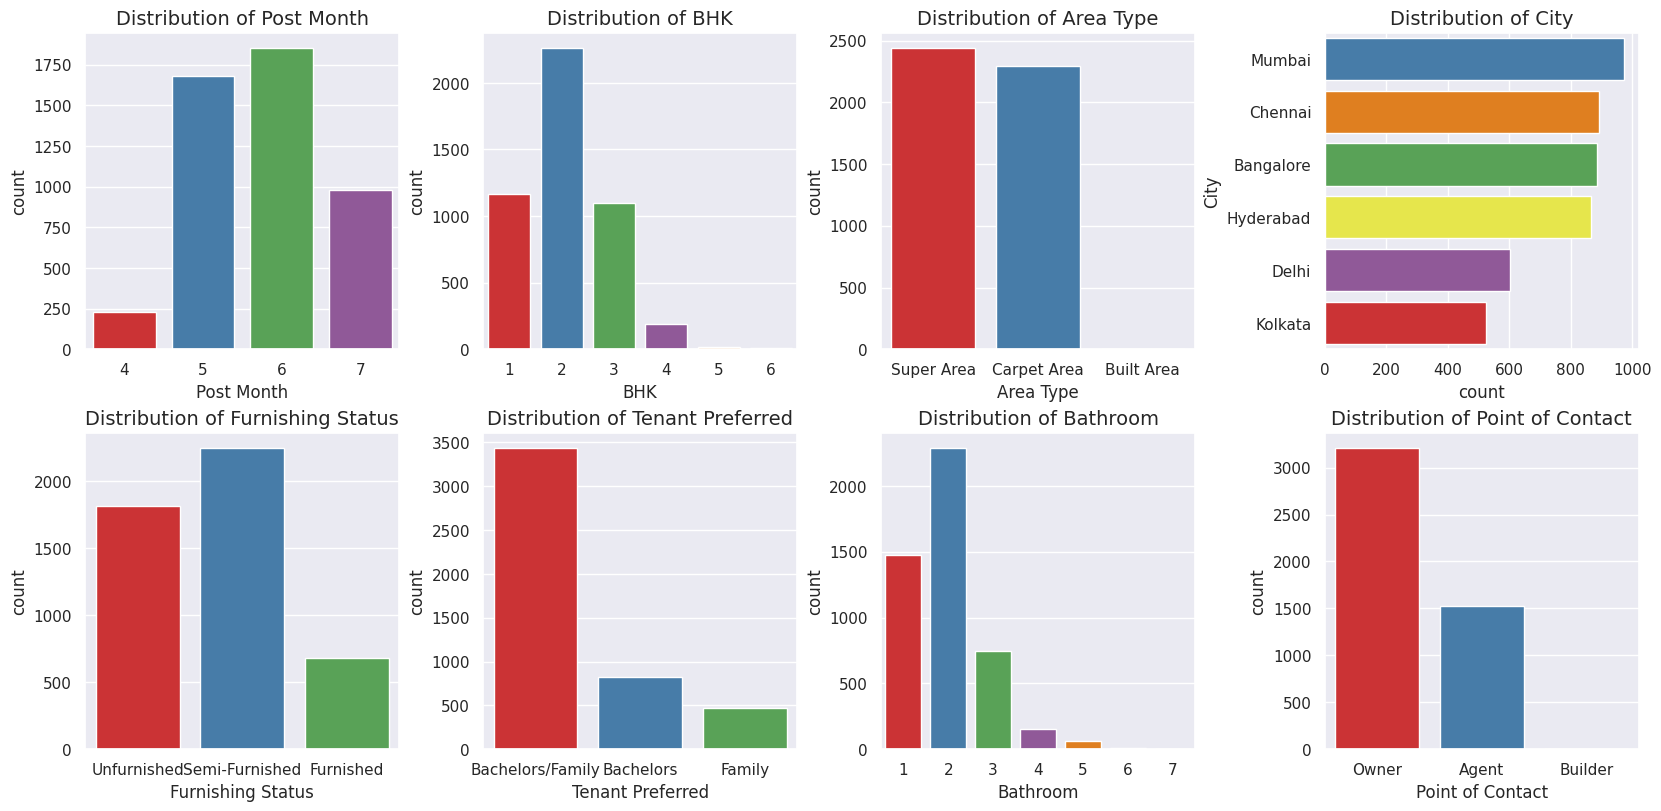

In [509]:
columns = ["Post Month", "BHK", "Area Type", "City", "Furnishing Status", "Tenant Preferred", "Bathroom", "Point of Contact"]
bar_chart(df, columns)

* **Post Month**: the months in which posts occur are the two last months of spring, April and May, and the first two months of the summer, June and July. The highest number of posts happens in June which is the middle month of the year, followed by May. 
* **BHK**: most of the houses have 2 BHK, followed by 1 and 3. This range makes sense, considering that the preferred tenants are both bachelors and families, and up to 3 BHK is typically sufficient. The appearance of 5 and 6 BHK on the plot is rare, indicating larger and more luxurious homes with higher prices.
* **Area Type**: it seems that in India, the majority of houses are calculated either on Super area or Carpet area, with a slight preference for Super Area. However, calculating the area based on the Built area is not preferred at all because nobody cares about the thickness of the inner and outer wall.  
* **City**: the available cities in the renting platforms are the 6 biggest cities in India. The city with the most houses is Mumbai (the financial capital of India), followed by Chennai, Bangalore, and Hyderabad, which have almost the same number of houses. It's interesting to note that Delhi which is the capital of India, comes 4th in the row. One possible reason is that the dataset predominantly contains moderate-sized houses, but due to the high population of Delhi, there are mostly smaller houses.
* **Furnishing Status**: the most preferred furnishing status for houses is Semi-Furnished, followed by Unfurnished. Furnished status is less common, with less than half of the Unfurnished cases. This preference can be attributed to various factors. One reason is the tenants' tendency to be negligent in caring for the owners' items. Another reason is that tenants may reject a house if they dislike the existing furnishings. Furnished status is often found in luxurious homes where interior design complexity is higher, potentially requiring the expertise of an interior designer. Hence, the majority of owners prefer to provide homes with only basic furnishings, such as an oven.
* **Tenant Preferred**: it seems that the owners do not have any preference regarding whether the tenant is a bachelor or a family.
* **Bathroom**: bathroom follows the same distribution with BHK. More bathrooms indicating larger and more luxurious homes with higher prices.
* **Point of Contact**: it appears that owners prefer to sell their homes independently, but there is also a significant portion near the half that opts to collaborate with agencies. We assume that owners tend to rent their houses without the help of an agent when the house is small or medium. This assumption seems to be true, because "Contact the Owner" is the most frequent, and 2 BHK (small houses) is also the most frequent. Lastly, Contact Builder has only one post.

In [510]:
def pie_plot(df, columns):
    fig, axes = plt.subplots(nrows=ceil(len(columns) / 3), ncols=3, constrained_layout=True, figsize=(18, 5*ceil(len(columns) / 3)))
    current_row = 0
    current_col = 0

    for i, col in enumerate(columns):
        # theme = plt.get_cmap("plasma")  
        wedges, texts, autotexts = axes[current_row, current_col].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.2f%%', textprops={"color": "black", "fontsize": 10})
        
        axes[current_row, current_col].legend(loc="upper left", bbox_to_anchor=(1, 1), labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
        axes[current_row, current_col].set_title(f"{col}", fontsize=15)

        current_col += 1
        if current_col >= 3:
            current_col = 0
            current_row += 1

    plt.show()

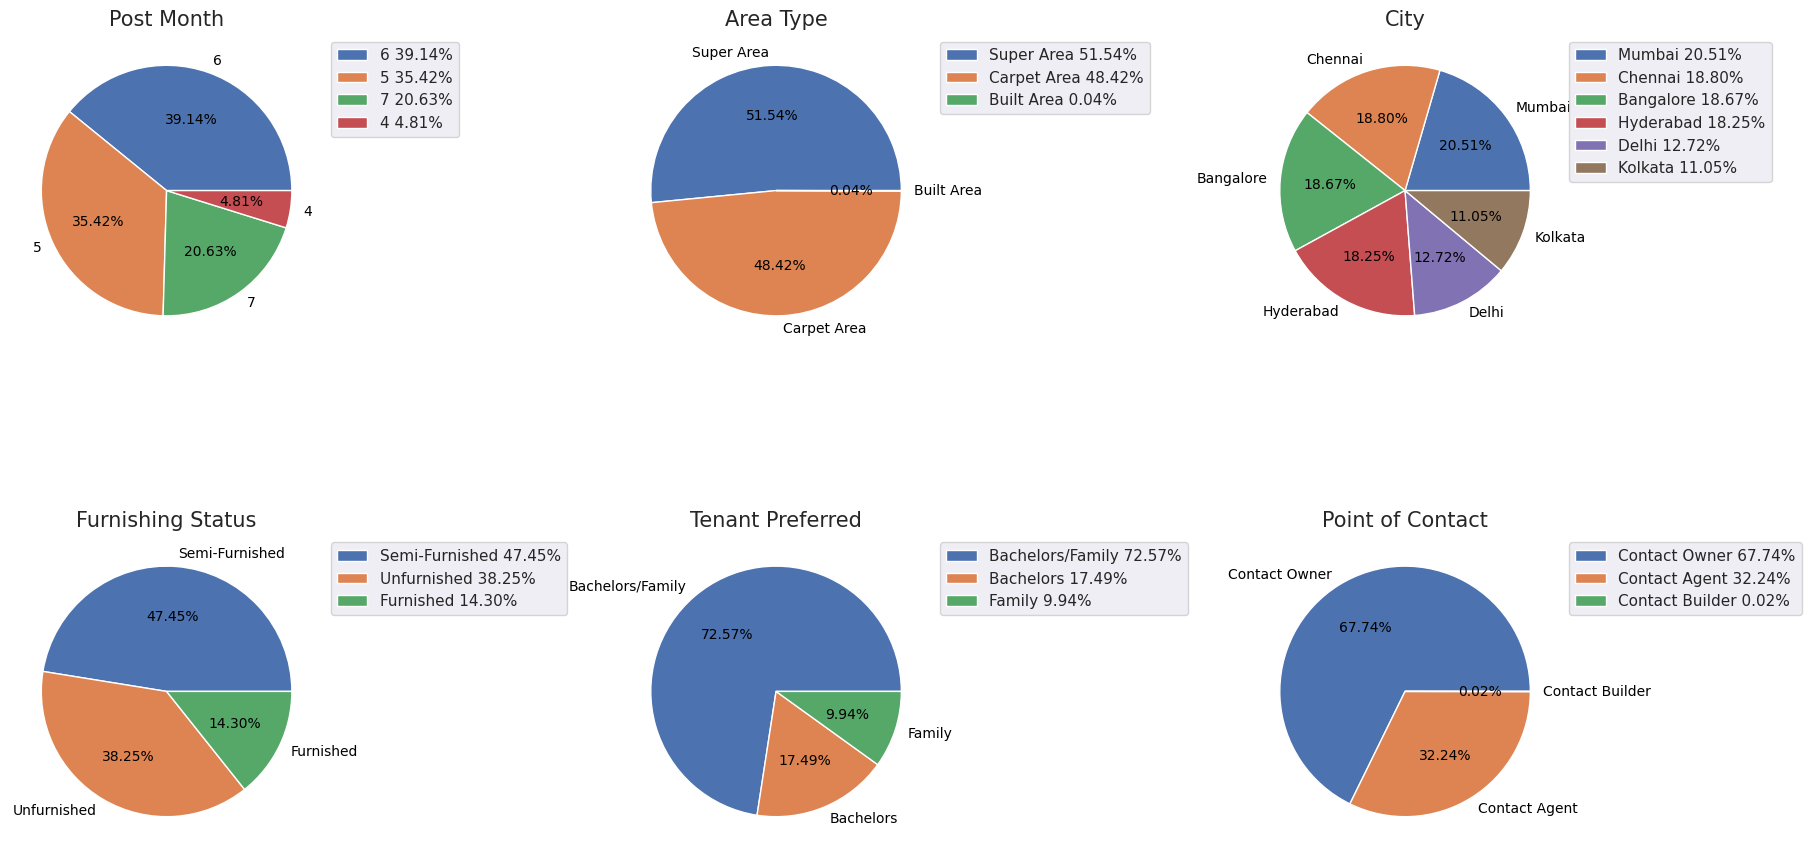

In [511]:
columns = ["Post Month", "Area Type", "City", "Furnishing Status", "Tenant Preferred", "Point of Contact"]
pie_plot(df, columns)

### Bivariate Analysis

In [512]:
def scatter_plot(df, columns):
    subplot_titles = []
    for title in columns:
        subplot_titles.append(title + " vs Rent")

    figs = make_subplots(rows=ceil(len(columns) / 3), cols=3, subplot_titles=subplot_titles)
    figs.layout.font.size = 18

    current_row = 1
    current_col = 1

    for i, col_xy in enumerate(columns):
        figs.append_trace(go.Scatter(x=df[col_xy].values, y=df["Rent"].values, name=col, mode="markers"),
                          row=current_row, col=current_col)

        current_col += 1
        if current_col > 3:
            current_col = 1
            current_row += 1
    
    figs.update_annotations(font_size=24)
    figs.update_layout(height=600, width=1500, showlegend=False)
    figs.show()

In [513]:
columns = ["Size", "BHK", "Bathroom"]
scatter_plot(df, columns)             

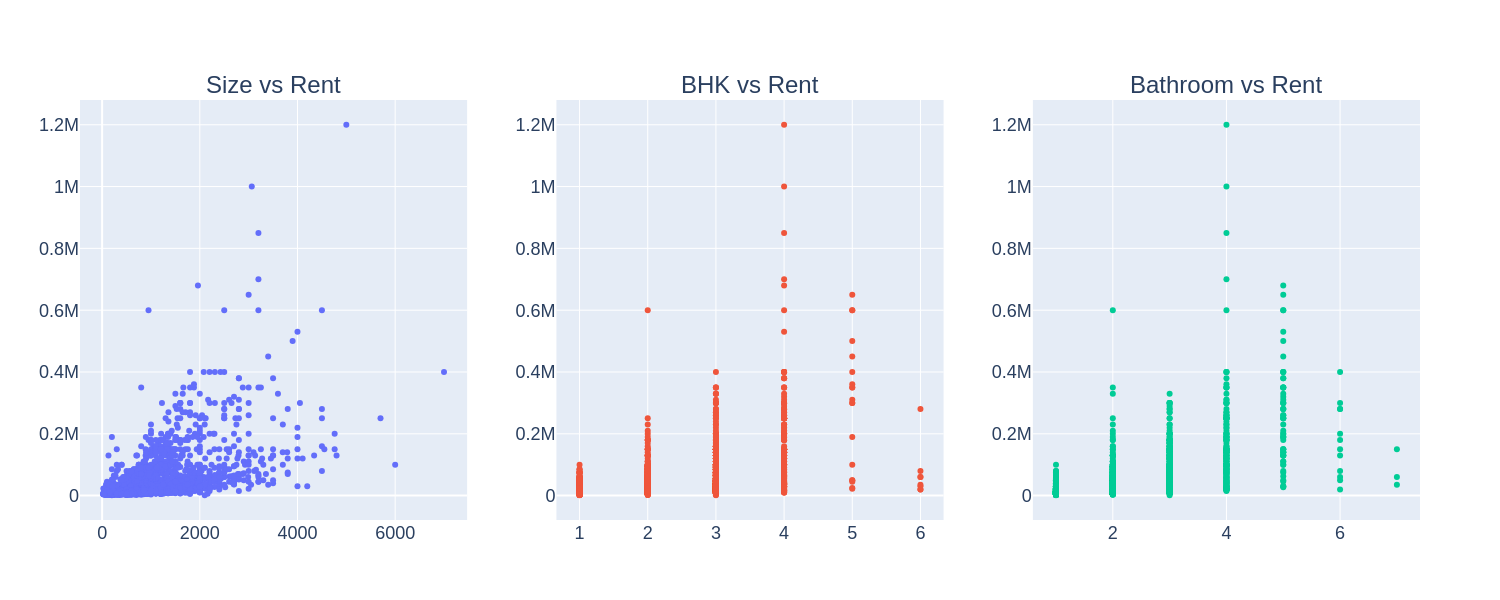

* **Size vs Rent**: in the scatter plot, we can observe that the data is concentrated near the origin, indicating that most of the houses provided by renting platforms have a size of less than 2,000 sq.ft. Additionally, it appears that there is a positive linear correlation between the size and the rent, suggesting that the rent of houses increases with the size. Therefore, our hypothesis was correct that houses with a size less than 1,000 sq.ft are more in demand because they have better rent.
* **BHK vs Rent**: we observe that as the number of BHK increases up to 4, and consequently, the size of the house, the rent also increases. This conclusion aligns with the findings from the first scatter plot. However, it's noteworthy that the maximum rent is found in 4 BHK and not in 5 or 6 BHK, which seems unusual. These houses with the maximum rent and 4 BHK may be super luxurious.
* **Bathroom vs Rent**: this plot has the same behaviour with "BHK vs Rent" plot.

In [514]:
# Make a box plot with 2 variables
def box_plot_2(df, columns):
    subplot_titles = []
    for title in columns:
        subplot_titles.extend([title + " vs Rent", title + " vs Size"])

    figs = make_subplots(rows=ceil(len(columns)), cols=2, subplot_titles=subplot_titles)
    figs.layout.font.size = 18

    for i, col in enumerate(columns):
        # Box plot for Rent
        figs.append_trace(go.Box(x=df[col].values, y=df["Rent"].values, name=col + " vs Rent", boxmean="sd"), row=i + 1, col=1)
        # Box plot for Size
        figs.append_trace(go.Box(x=df[col].values, y=df["Size"].values, name=col + " vs Size", boxmean="sd"), row=i + 1, col=2)

    figs.update_annotations(font_size=24)
    figs.update_layout(showlegend=False, width=1500, height=800)

    figs.show()

In [515]:
columns = ["BHK", "City"]
box_plot_2(df, columns)

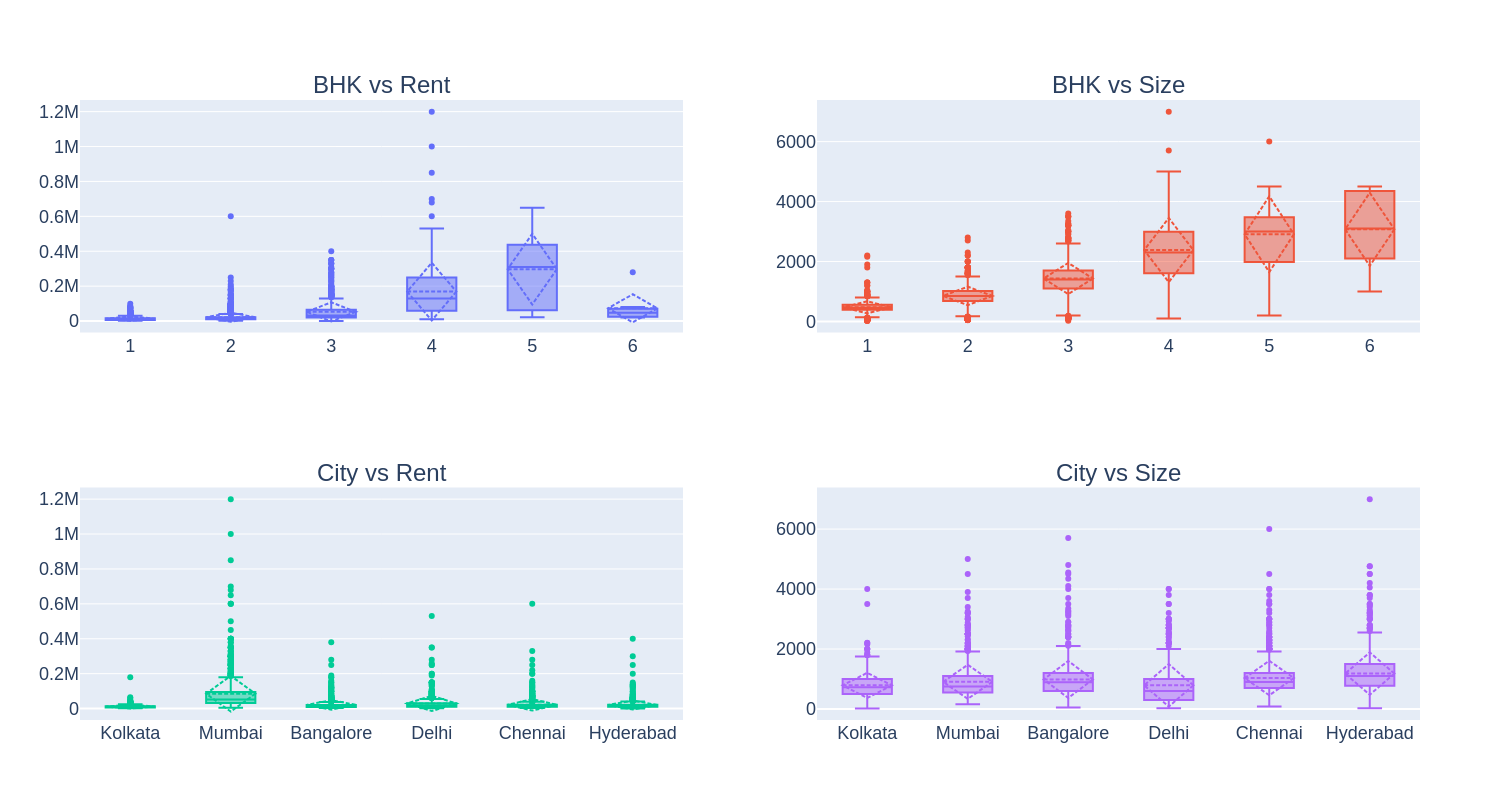

* **BHK vs Rent**: houses with 5 BHK have the maximum mean value of rent, followed by 4, 6, 3, 2, and 1 BHK. This makes sense because it agrees with the findings from the "Size vs Rent" scatter plot. The only thing that is weird is that the houses with 4 and 5 BHK are more expensive than those with 6 BHK. One reason could be the condition of these houses (perhaps they are old). Also, it is verry important to mention that the rent increase is exponential and not linear.
* **BHK vs Size**: it is absolutely logical that the size of the house increases as the number of BHK increases.
* **City vs Rent** : Mumbai has the highest mean house rent, followed by Delhi, Chennai, Bangalore, Hyderabad, and Kolkata. Our previous assumption that the high demand for houses in Mumbai is due to better rental prices compared to other cities is incorrect. The reason behind this is that Mumbai is the financial capital of India, so houses have higher prices. Additionally, Mumbai not only has the highest mean rent but also the highest standard deviation, indicating that rental prices in Mumbai can vary significantly from the mean. Another insight is that Chennai, Bangalore, and Hyderabad have almost the same mean rent. This raises a question for these three cities: In which city can I get the biggest house for the same amount of money? 
* **City vs Size**: Hyderabad has the biggest houses, followed by Chennai, Bangalore, Mumbai and Kolkata with Delhi which have the same house size mean. Answering the previous question, with the same amount of money we can rent a bigger house in Hyderabad, then in Chennai, and last in Bangalore. Moreover, our previous assumption that Delhi due to it's high population has smaller houses it's absolute correct. Lastly, the standard deviations of all cities are too high and this is the reason we can observe so many outliers.

In [516]:
columns = ["Furnishing Status", "Tenant Preferred"] 
box_plot_2(df, columns)

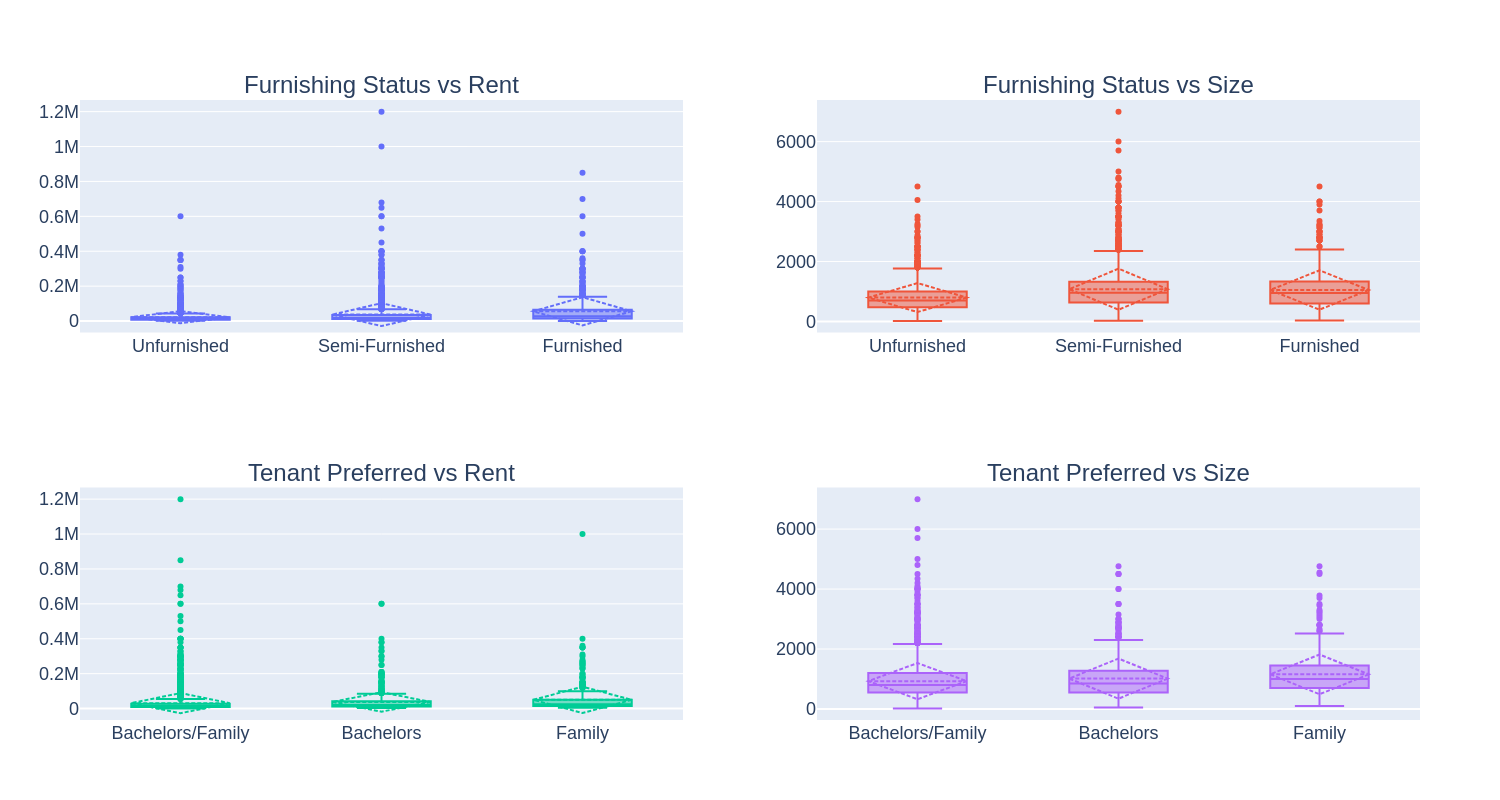

* **Furnishing Status vs Rent**:  as expected, the furnishing status of the houses affects the prices. Furnished houses have the highest mean rent, followed by Semi-Furnished and Unfurnished houses, which makes perfect sense. Additionally, due to the high standard deviation of semi-furnished and furnished houses, we can find houses with both furnishing statuses at lower price points. However, there are two semi-furnished outliers with higher rent than the furnished houses.  
* **Furnishing Status vs Size**: Semi-furnished and furnished houses have almost the same size. However, we observe more outliers in semi-furnished houses. Unfurnished houses are predominantly found in small houses, with their distribution having a smaller standard deviation compared to the other statuses. This indicates that we can find unfurnished houses mostly in small houses. On the other hand, for both semi-furnished and furnished houses, we can find them in a broader range of sizes.
* **Tenant Preferred vs Rent**: it seems that the "Tenant Preferred" category doesn't have any significant impact on the rent. We observe a slightly higher mean and standard deviation for families. This observation is reasonable, as families generally require larger houses, leading to higher rents. However, I would have expected a more pronounced increase in rents for families.
* **Tenant Preferred vs Size**: families, which typically have more members than bachelors, require larger houses.

In [517]:
columns = ["Bathroom", "Point of Contact"]
box_plot_2(df, columns)

* **Bathroom vs Rent**: this variable has the same behavior with BHK. The increase in rent is exponential up to 5 bathrooms, but for 6 and 7, there is a decrease in rent. It's worth investigating why this occurs.
* **Bathroom vs Size**: same results with "BHK vs Size".
* **Point of Contact vs Rent**: contacting an agent tends to occur in cases with higher rents, while contacting the owner is more common when the rent is lower. This phenomenon is likely due to the fact that houses with higher rents require expertise and skills, qualities that agents possess. Also, agents take commission. 
* **Point of Contact vs Size**: similar to the "Point of Contact vs Rent" pattern, reaching out to an agent is more frequent in cases with larger houses, correlating with higher rents. Conversely, contacting the owner is more common for smaller houses, associated with lower rents.

In [518]:
# Make a Violin plot with 2 variables
def violin_plot_2(df, columns):
    subplot_titles = []
    for title in columns:
        subplot_titles.extend([title + " vs Rent", title + " vs Size"])

    figs = make_subplots(rows=ceil(len(columns)), cols=2, subplot_titles=subplot_titles)
    figs.layout.font.size = 18

    for i, col in enumerate(columns):
        # Box plot for Rent
        figs.append_trace(go.Violin(x=df[col].values, y=df["Rent"].values, name=col + " vs Rent"), row=i + 1, col=1)
        # Box plot for Size
        figs.append_trace(go.Violin(x=df[col].values, y=df["Size"].values, name=col + " vs Size"), row=i + 1, col=2)

    figs.update_annotations(font_size=24)
    figs.update_layout(showlegend=False, width=1500, height=800)

    figs.show()

In [519]:
columns = ["BHK", "City"]
violin_plot_2(df, columns)

In [520]:
columns = ["Furnishing Status", "Tenant Preferred"] 
violin_plot_2(df, columns)

In [521]:
columns = ["Bathroom", "Point of Contact"]
violin_plot_2(df, columns)

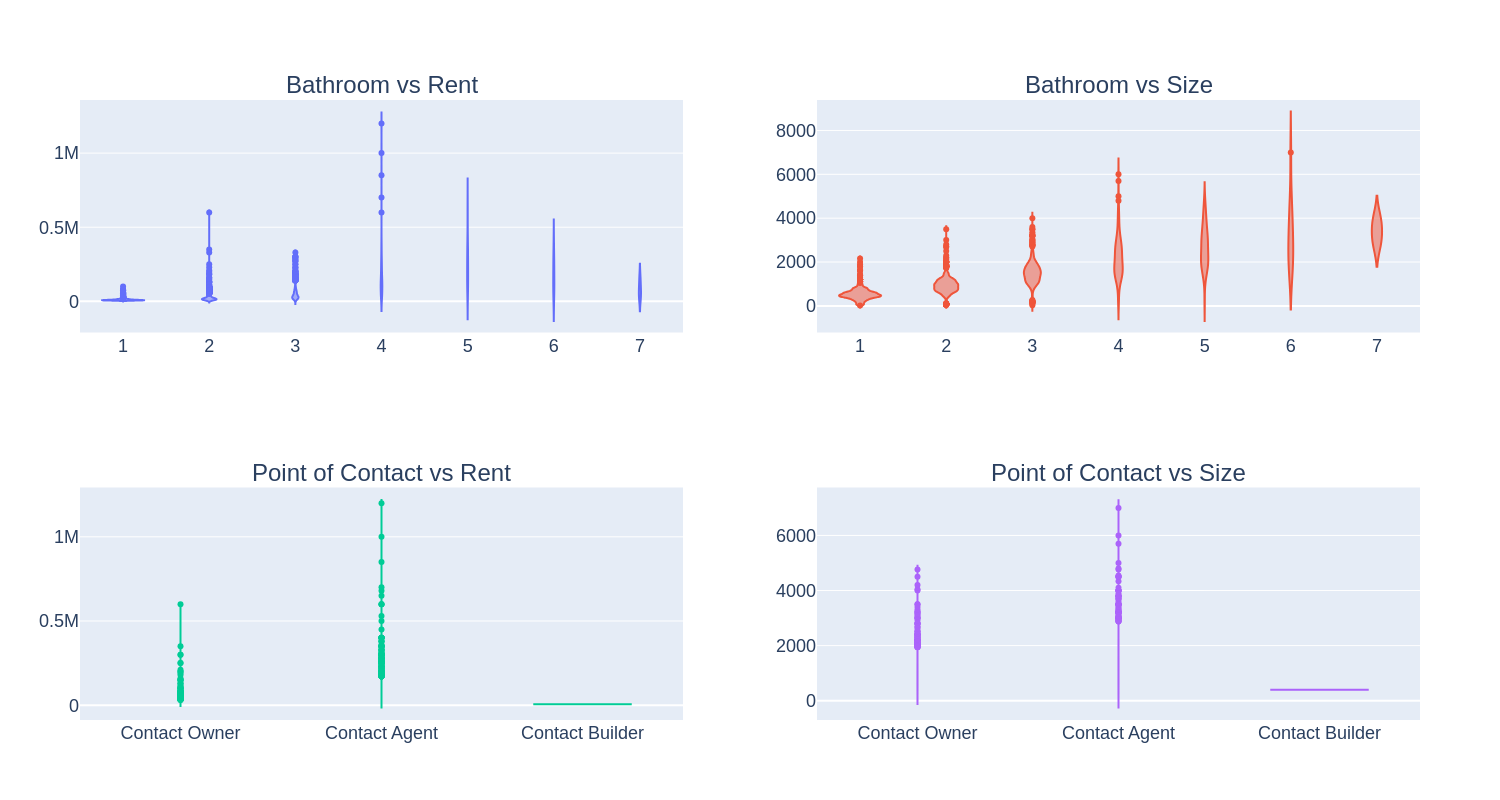

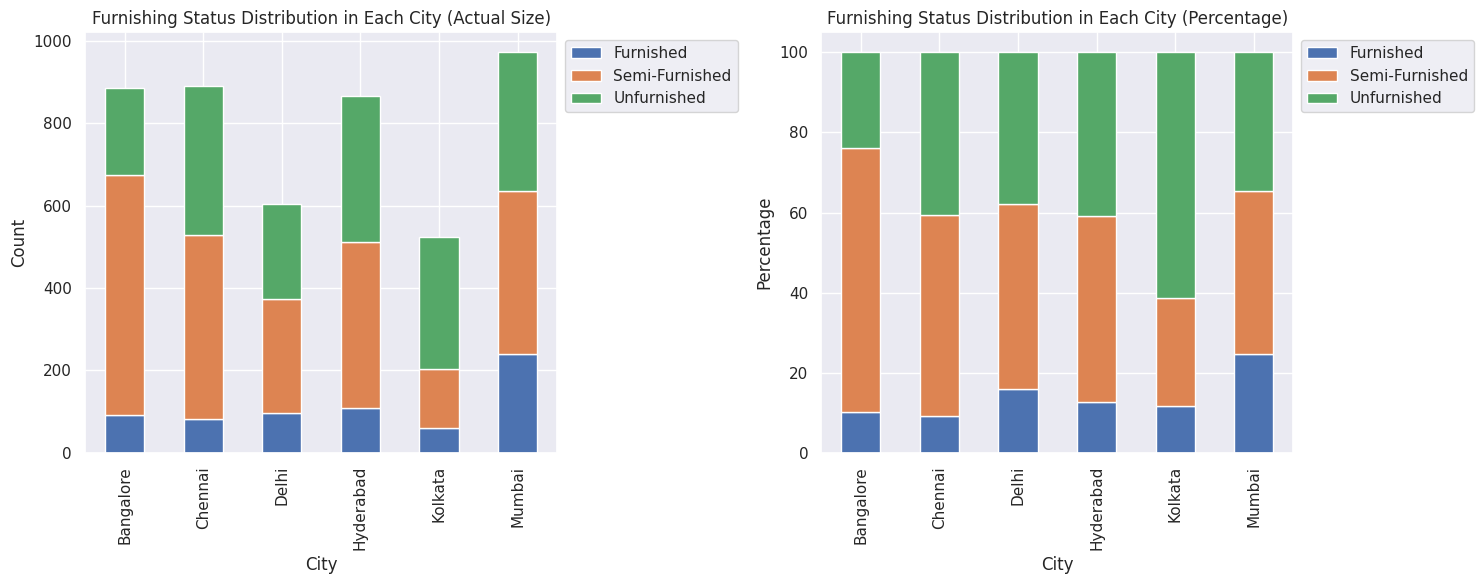

In [522]:
# Stacked Bar charts with the Furnishing Status in each city
df_grouped = df.groupby(['City', 'Furnishing Status']).size().unstack()

ax1 = plt.subplot(1, 2, 1)
df_grouped.plot(kind='bar', stacked=True, ax=ax1, figsize=(15, 6))
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('Furnishing Status Distribution in Each City (Actual Size)')
ax1.set_xlabel('City')
ax1.set_ylabel('Count')

df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

ax2 = plt.subplot(1, 2, 2)
df_percentage.plot(kind='bar', stacked=True, ax=ax2, figsize=(15, 6))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('Furnishing Status Distribution in Each City (Percentage)')
ax2.set_xlabel('City')
ax2.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

* In Bangalore, Chennai, Delhi, Hyderabad and Mumbai, the majority of the houses are Semi-Furnished, with Hyderabad and Mumbai having almost the same percentage of unfurnished and semi-furnished houses. 
* However, in Kolkata the most houses are unfurnished. 
* In Mumbai there is a higher percentage of furnished houses than the other cities, which potentially contribute to the highest rent mean we observed earlier. 
* Generally, except in Mumbai, the percentage of furnished houses in most cities is around 10-15% of the total houses.

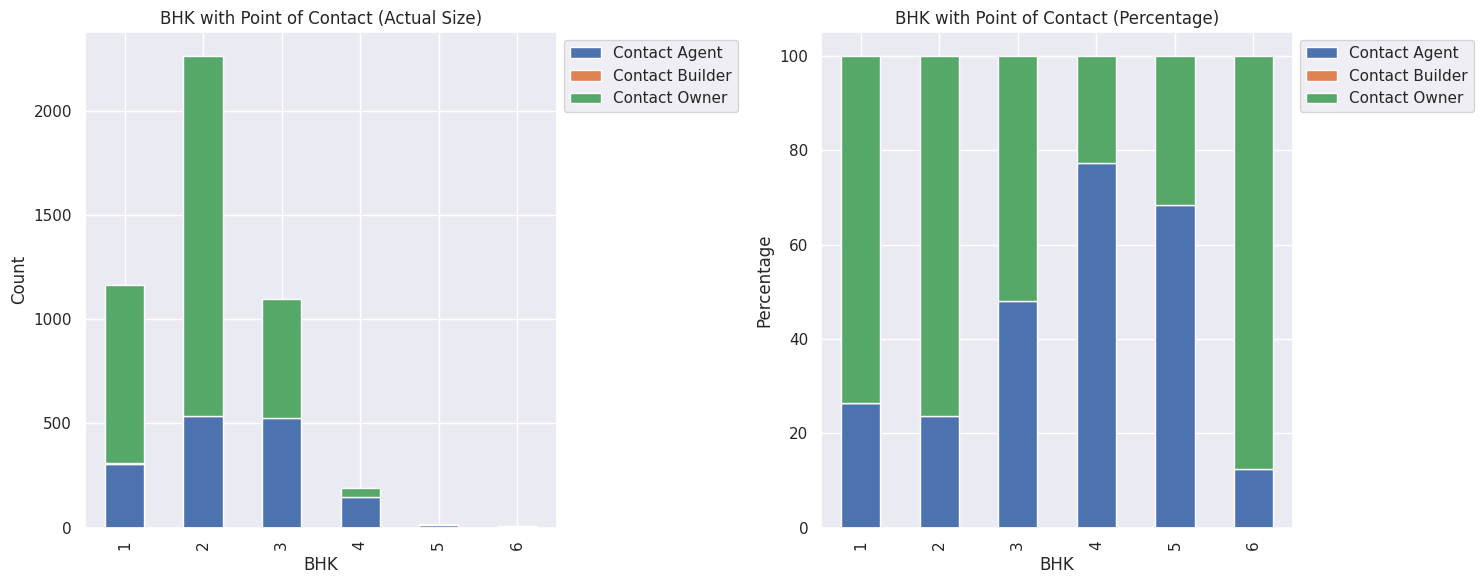

In [523]:
# Stacked Bar charts with the Point of Contact and BHK
df_grouped = df.groupby(['BHK', 'Point of Contact']).size().unstack()

ax1 = plt.subplot(1, 2, 1)
df_grouped.plot(kind='bar', stacked=True, ax=ax1, figsize=(15, 6))
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('BHK with Point of Contact (Actual Size)')
ax1.set_xlabel('BHK')
ax1.set_ylabel('Count')

df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

ax2 = plt.subplot(1, 2, 2)
df_percentage.plot(kind='bar', stacked=True, ax=ax2, figsize=(15, 6))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('BHK with Point of Contact (Percentage)')
ax2.set_xlabel('BHK')
ax2.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

* Our earlier assumption that smaller houses tend to have owners contacting customers directly, while larger houses are more likely to involve real estate agents, has proven to be accurate. Point of Contact for houses with 1, 2, and,for some reason 6 BHK, is to Contact the Owner. 
* For 3 BHK it's almost 50% to contact the owner or an agent, and for houses with 4 and 5 BHK, it's more common to engage with an agent.
* Previously, we observed that 6 BHK houses have lower rents than 4 and 5 BHK houses. One contributing factor is that the preferred point of contact for 6 BHK houses is to 'Contact with Owner,' which typically results in lower costs.

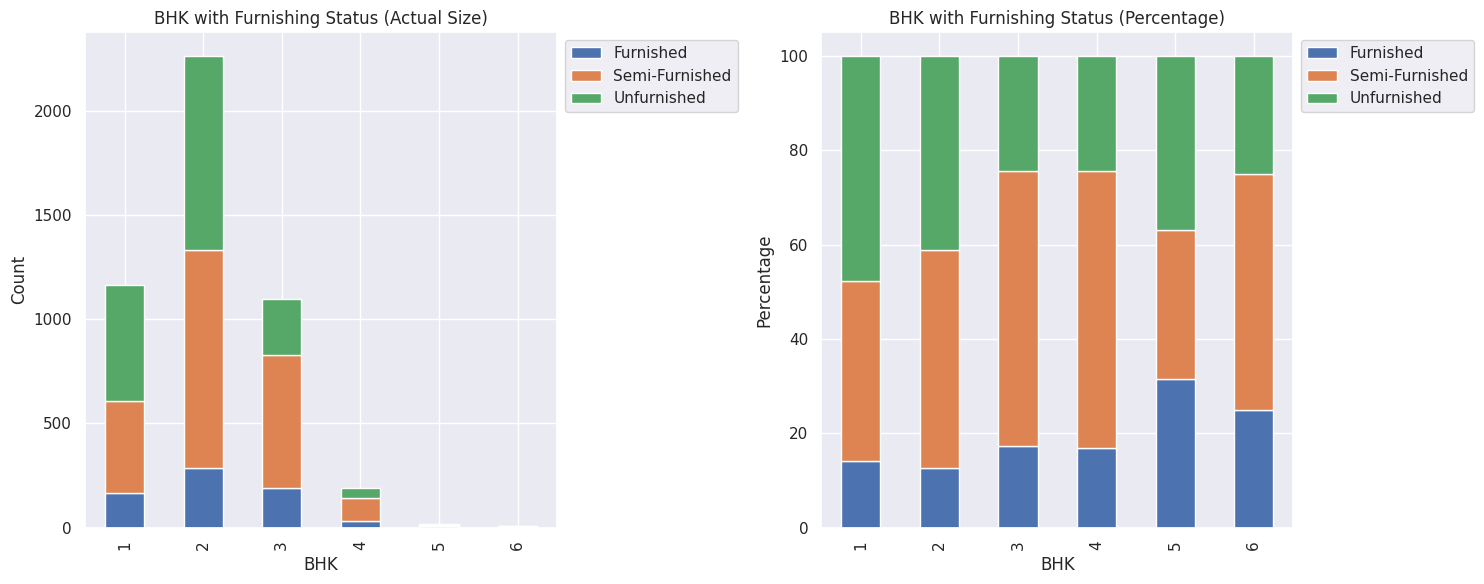

In [524]:
# Stacked Bar charts with BHK and Furnishing Status
df_grouped = df.groupby(['BHK', 'Furnishing Status']).size().unstack()

ax1 = plt.subplot(1, 2, 1)
df_grouped.plot(kind='bar', stacked=True, ax=ax1, figsize=(15, 6))
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('BHK with Furnishing Status (Actual Size)')
ax1.set_xlabel('BHK')
ax1.set_ylabel('Count')
plt.xticks(rotation=90)

df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

ax2 = plt.subplot(1, 2, 2)
df_percentage.plot(kind='bar', stacked=True, ax=ax2, figsize=(15, 6))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('BHK with Furnishing Status (Percentage)')
ax2.set_xlabel('BHK')
ax2.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

* Our earlier observation from box plot "Furnishing Status vs Size" that unfurnished houses are predominantly found in small houses, is being confirmed by this bar chart. We can see that for 1 BHK the 50% of the houses are unfurnished.
* For 3, 4, and 5 BHK the majority of houses are semi-furnished.
* For 2 and 5 BHK the percentage of semi-furnished and unfurnished is almost equal.
* While the number of BHK in the house increases, the number of furnished houses also increases. However, the number of unfurnished houses decreases (except 5).
* The unfurnished percentage of 3, 4, and 6 BHK is equal.
* The percentage of all furnishing statuses for 5 BHK is equal.

### Correlation Analysis

In [525]:
correlation_matrix = df[["BHK", "Rent", "Size", "Flat Floor", "Total Floors", "Bathroom"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: >

* Size of houses is increased by increasing the number of BHK and bathrooms.
* Rent is increased by increasing the size of the house.
* The rent appears to be higher for houses located on higher flat floors.
* The higher the total number of floors in the building, the likelihood of obtaining a taller house increases.